# **Importa as bibliotecas necessárias e também o arquivo do excel**

In [35]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import linregress

arquivo = "planilha_dados_imoveis.xlsx"


In [36]:
dados = pd.read_excel(arquivo)
dados.head()

,ID,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,1,Planalto Paulista,São Paulo,1000,4,8,6,7000000
1,2,Jardim dos Estados,São Paulo,496,4,4,4,3700000
2,3,Jardim Reimberg,São Paulo,125,4,3,2,380000
3,4,Jardim Morumbi,São Paulo,310,3,2,4,685000
4,5,Mooca,São Paulo,100,3,2,2,540000


#**Variavel Qualitativa: Bairro**#

In [37]:
Bairros = dados.Bairro.value_counts().sort_index()
Bairros

Aclimação             79
Alto da Boa Vista      8
Alto da Lapa          80
Alto da Mooca         20
Alto de Pinheiros    369
                    ... 
Vila Água Funda        5
Água Branca           12
Água Fria             12
Água Funda             2
Água Rasa              6
Name: Bairro, Length: 696, dtype: int64

In [38]:
somaBairros = Bairros.sum()
somaBairros

9140

In [39]:
dadosQualitativos = pd.DataFrame(Bairros)
dadosQualitativos

,Bairro
Aclimação,79
Alto da Boa Vista,8
Alto da Lapa,80
Alto da Mooca,20
Alto de Pinheiros,369
...,...
Vila Água Funda,5
Água Branca,12
Água Fria,12
Água Funda,2


In [40]:
dadosQualitativos['Frequência %']=round(dadosQualitativos['Bairro']*100/somaBairros,2)
dadosQualitativos

,Bairro,Frequência %
Aclimação,79,0.86
Alto da Boa Vista,8,0.09
Alto da Lapa,80,0.88
Alto da Mooca,20,0.22
Alto de Pinheiros,369,4.04
...,...,...
Vila Água Funda,5,0.05
Água Branca,12,0.13
Água Fria,12,0.13
Água Funda,2,0.02


**Tabela com frequência absoluta e frequência percentual**

In [41]:
tabela = pd.DataFrame({"Bairro":dadosQualitativos.index,"Frequência":dadosQualitativos['Bairro'],"Frequência %":dadosQualitativos["Frequência %"]})
tabela

,Bairro,Frequência,Frequência %
Aclimação,Aclimação,79,0.86
Alto da Boa Vista,Alto da Boa Vista,8,0.09
Alto da Lapa,Alto da Lapa,80,0.88
Alto da Mooca,Alto da Mooca,20,0.22
Alto de Pinheiros,Alto de Pinheiros,369,4.04
...,...,...,...
Vila Água Funda,Vila Água Funda,5,0.05
Água Branca,Água Branca,12,0.13
Água Fria,Água Fria,12,0.13
Água Funda,Água Funda,2,0.02


**Gráfico adequado**

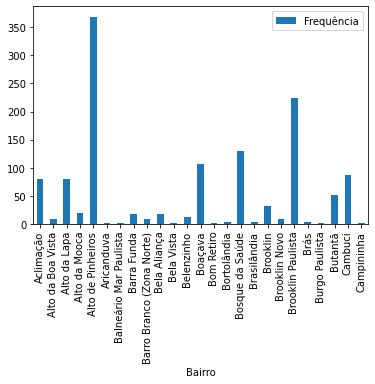

In [42]:
tabela.head(25).plot.bar(x='Bairro', y='Frequência', rot=90)


**Cálculo da moda**
Nota-se que o bairro que mais há casas à venda em São Paulo é o bairro Alto de Pinheiros, totalizando 369 (cerca de 4,04%) casas à venda.

In [43]:
dados.Bairro.mode()

0    Alto de Pinheiros
dtype: object

#**Variavel Quantitativa 1: Metragem**#

In [44]:
valorMetragem = dados.Metragem.value_counts()
valorMetragem

200     206
300     188
250     150
180     148
400     147
       ... 
609       1
942       1
1181      1
767       1
507       1
Name: Metragem, Length: 871, dtype: int64

In [45]:
qntMetragem = valorMetragem.sum()
qntMetragem

9140

In [46]:
dadosQuantitativos1 = pd.DataFrame(valorMetragem)
dadosQuantitativos1

,Metragem
200,206
300,188
250,150
180,148
400,147
...,...
609,1
942,1
1181,1
767,1


In [47]:
dadosQuantitativos1['Frequência %']=round(dadosQuantitativos1['Metragem']*100/somaBairros,2)
dadosQuantitativos1

,Metragem,Frequência %
200,206,2.25
300,188,2.06
250,150,1.64
180,148,1.62
400,147,1.61
...,...,...
609,1,0.01
942,1,0.01
1181,1,0.01
767,1,0.01


**Tabela com frequência absoluta e frequência percentual**

In [48]:
tabela2 = pd.DataFrame({"Metragem":dadosQuantitativos1.index,"Frequência":dadosQuantitativos1['Metragem'],"Frequência %":dadosQuantitativos1["Frequência %"]})
tabela2

,Metragem,Frequência,Frequência %
200,200,206,2.25
300,300,188,2.06
250,250,150,1.64
180,180,148,1.62
400,400,147,1.61
...,...,...,...
609,609,1,0.01
942,942,1,0.01
1181,1181,1,0.01
767,767,1,0.01


**Gráfico adequado (exibe as 25 metragens com maior frequência)**

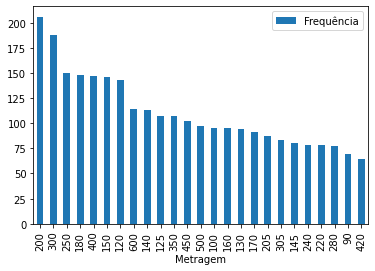

In [49]:
tabela2.head(25).plot.bar(x='Metragem', y = 'Frequência', rot=90)



**Cálculo da média**
Existirem casas com metragem alta e apartamentos com metragens baixas (os chamados outliers) e a média não consegue indicar o tamanho de fato da maioria das casas.

In [50]:
dados.Metragem.mean()

344.44978118161924

**Cálculo da mediana**
A médiana indica de forma mais precisa o valor central, pois há varias casas com metragens próximas ao encontrado. 

In [51]:
dados.Metragem.median()

275.0

**Cálculo da moda**
A maior ocorrência são de casas com 200 m².

In [52]:
dados.Metragem.mode()

0    200
dtype: int64

#**Variavel Quantitativa 2: Valor**#

In [53]:
qntValor = dados.Valor.value_counts()
qntValor

2500000     182
3500000     174
1200000     170
1600000     150
1500000     150
           ... 
352800        1
29780000      1
371000        1
1675000       1
1908000       1
Name: Valor, Length: 935, dtype: int64

In [54]:
somaValor = qntValor.sum()
somaValor

9140

In [55]:
dadosQuantitativos2 = pd.DataFrame(qntValor)
dadosQuantitativos2

,Valor
2500000,182
3500000,174
1200000,170
1600000,150
1500000,150
...,...
352800,1
29780000,1
371000,1
1675000,1


In [56]:
dadosQuantitativos2['Frequência %']=round(dadosQuantitativos2['Valor']*100/somaBairros,2)
dadosQuantitativos2

,Valor,Frequência %
2500000,182,1.99
3500000,174,1.90
1200000,170,1.86
1600000,150,1.64
1500000,150,1.64
...,...,...
352800,1,0.01
29780000,1,0.01
371000,1,0.01
1675000,1,0.01


**Tabela com frequência absoluta e frequência percentual**

In [57]:
tabela3 = pd.DataFrame({"Valor":dadosQuantitativos2.index,"Frequência":dadosQuantitativos2['Valor'],"Frequência %":dadosQuantitativos2["Frequência %"]})
tabela3

,Valor,Frequência,Frequência %
2500000,2500000,182,1.99
3500000,3500000,174,1.90
1200000,1200000,170,1.86
1600000,1600000,150,1.64
1500000,1500000,150,1.64
...,...,...,...
352800,352800,1,0.01
29780000,29780000,1,0.01
371000,371000,1,0.01
1675000,1675000,1,0.01


**Gráfico adequado (exibe as 25 metragens com maior frequência)**

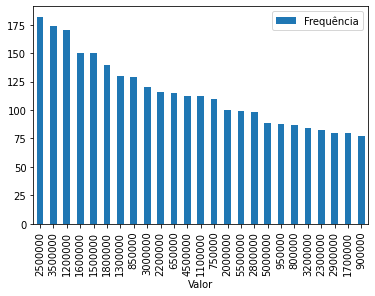

In [58]:
tabela3.head(25).plot.bar(x='Valor', y = 'Frequência', rot=90)

**Cálculo da média**
A média indica o alto valor das casas na cidade de São Paulo, onde apesar de existirem casas com preços mais baixos a sua ocorrência é pequena. 

In [59]:
dados.Valor.mean().round(2)

3050234.93

**Cálculo da mediana**
A mediana indica que pelo menos metade das casas de São Paulo (avaliadas nesse estudo) custam mais de 1,8 milhões de reais. 

In [60]:
dados.Valor.median().round(2)

1800000.0

**Cálculo da moda**
A maioria das casas que estão à venda na cidade de São Paulo estão custando 2,5 milhões de reais. 

In [61]:
dados.Valor.mode()

0    2500000
dtype: int64

#**Variavel Quantitativa 1: Metragem**#

1. **Separatrizes**
2. **Boxplot**
3. **Valores Discrepantes**





**Medidas Separatrizes Q1, Q2 e Q3:** 

* Q1 = 168,00 - 25% das casas apresentadas possuem metragem inferior a 168 m²
* Q2 = 275,00 - 50% das casas apresentadas possuem até 275 m²
* Q3 = 450,00 - 25% das casas apresentadas possuem metragem maior que 450 m²

Há valores discrepantes como 10 m² o que pode indicar erro de digitação ou uma sala comercial e 2850 m² que também pode ser erro de digitação, mas pode indicar, por exemplo um terreno do Governo ou uma empresa, explicando o seu tamanho maior que os demais. 



In [84]:
dados.Metragem.describe().round(2)

count    9140.00
mean      344.45
std       250.85
min        10.00
25%       168.00
50%       275.00
75%       450.00
max      2850.00
Name: Metragem, dtype: float64

**Boxplot**

Como há muitos valores discrepantes (muito superiores ao valor de Q3 e e alguns inferiores a Q1) o boxplot acaba por parecer "achatado". É possivel atráves do boxplot observar que os dados não são simétricos, avendo maior concentração com valores inferiores a 450 m². 

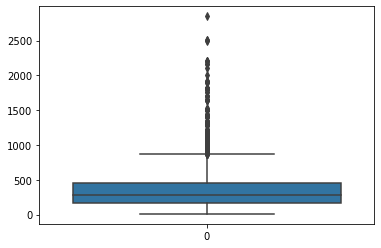

In [85]:
sns.boxplot(data = dados.Metragem)
plt.show()

#**Variavel Quantitativa 2: Valor**#

1. **Separatrizes**
2. **Boxplot**
3. **Valores Discrepantes**


**Medidas Separatrizes Q1, Q2 e Q3:** 

*   Q1 = R$890.000,00 - 25% das casas apresentadas possuem valor inferior a esse.

*   Q2 = R$1.800.000,00 - 50% das casas apresentadas custam mais de que esse valor na cidade de São Paulo.

*   Q3 = R$3.500.000,00 - 25% das casas apresentadas custam mais do que esse valor.








In [88]:
dados.Valor.describe().round(2)

count        9140.00
mean      3050234.93
std       3944029.50
min        147288.00
25%        890000.00
50%       1800000.00
75%       3500000.00
max      65000000.00
Name: Valor, dtype: float64

**Boxplot**

Valores de R$65 milhões em propriedades na cidade de São Paulo fazem o boxplot seja achatado. Valores como esses são minoria nesse estudo, o que chamamos de outliers ou valores discrepantes. Podem indicar possivel erro de digitação, mas pode tratar de casos reais onde o valor é muito superior aos outros. 

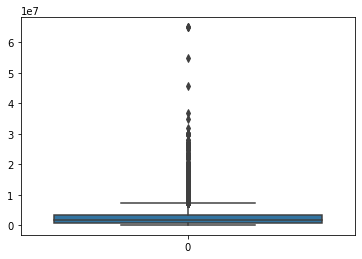

In [89]:
sns.boxplot(data = dados.Valor)
plt.show()

#**Estudo da correlação linear e da reta de regreção**#

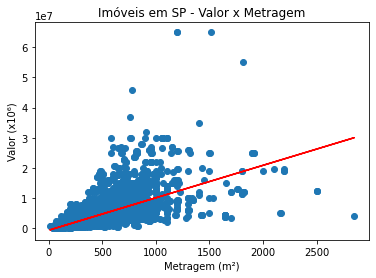

In [90]:
x = dados.Metragem.values
y = dados.Valor.values
res = stats.linregress(x,y)

plt.plot(x,y,'o',label='Dados')
plt.plot(x, res.slope*x + res.intercept, 'r', label = 'Reta de Regressão')
plt.title('Imóveis em SP - Valor x Metragem')
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor (x10⁶)')
#plt.legend()
plt.show()

In [91]:
print (f"Coeficiente de correlação r = {res.rvalue:.4f}")
print (f"Coeficiente linear = {res.intercept:.4f}")
print (f"Coeficiente angular = {res.slope:.4f}")
print (f"Reta de regressão linear y = {res.slope:.4f}",f"* x {res.intercept:.4f}")
print (f"Coeficiente de determinação r² = {res.rvalue**2:.4f}")

Coeficiente de correlação r = 0.6848
Coeficiente linear = -658145.6217
Coeficiente angular = 10766.0993
Reta de regressão linear y = 10766.0993 * x -658145.6217
Coeficiente de determinação r² = 0.4689
